In [37]:
import pandas as pd

In [38]:
# read in the data
crypt_data = pd.read_csv('Resources/crypto_data.csv')

In [39]:
crypt_data.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


## Data Preparation

In [40]:
# filter the data with isTrading = True
crypt_df = crypt_data[crypt_data['IsTrading']== True]

In [41]:
#Remove all rows that have at least one null value.
crypt_df = crypt_df.dropna()

In [42]:
# Filter for cryptocurrencies that have been mined
crypt_df = crypt_data[crypt_data['TotalCoinsMined']>0]

In [43]:
crypt_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [45]:
crypt_df['TotalCoinSupply'] = crypt_df['TotalCoinSupply'].to_numeric()

AttributeError: 'Series' object has no attribute 'to_numeric'

In [9]:
crypt_df = pd.get_dummies(crypt_df)

In [10]:
crypt_df.head()

,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Standardize dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
scaled_data = scaler.fit_transform(crypt_df)

## Dimensionality Reduction

In [13]:
from sklearn.decomposition import PCA

In [14]:
# Initialize PCA model
# preserve 90% of the explained variance in dimensionality reduction.
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(scaled_data)

In [15]:
from sklearn.manifold import TSNE

In [31]:
# further reduce the dataset dimensions with t-SNE 
tsne = TSNE(learning_rate=400)
crypto_tsne = tsne.fit_transform(crypto_pca)

In [32]:
import matplotlib.pyplot as plt

In [33]:
crypt_df['x'] = crypto_tsne[:,0]
crypt_df['y'] = crypto_tsne[:,1]

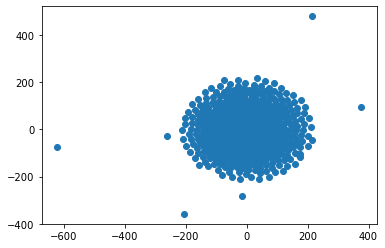

In [34]:
plt.scatter(crypt_df['x'],crypt_df['y'])
plt.show()

The scatter plot shows distinct clusters

## Cluster Analysis with K-Means

In [20]:
from sklearn.cluster import KMeans

###  Finding the best value for _k_ using the Elbow Curve

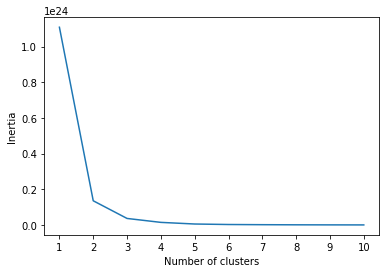

In [21]:
inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypt_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [22]:
df_elbow

,k,inertia
0,1,1.107869e+24
1,2,1.360160e+23
2,3,3.706397e+22
3,4,1.507048e+22
4,5,5.910189e+21
5,6,3.144927e+21
6,7,2.104758e+21
7,8,1.462605e+21
8,9,1.095928e+21
9,10,8.504489e+20


- The best k value from the elbow plot is 2